# TEXT AND SENTIMENT ANALYSIS USING ROBERTa IN AMAZON FOOD REVIEWS  
<div style='text-align:right;'><b>By AJEETH KUMAR G</b></div>

## LIBRARY IMPORT

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

## DATA IMPORT

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/00_SENTIMENT ANALYSIS/Reviews.csv')

## EDA

In [48]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [49]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [50]:
df.shape

(568454, 10)

**Lets take the first 500 rows for our analysis**

In [51]:
df = df.head(500)
df.shape

(500, 10)

In [52]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [54]:
df.Score.value_counts()

,count
Score,
5,339
4,70
3,37
1,36
2,18


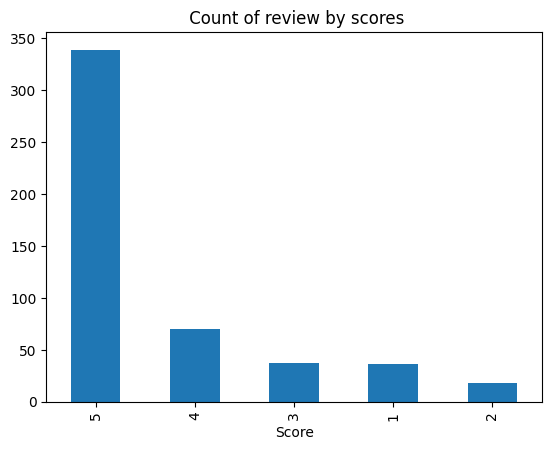

In [57]:
df.Score.value_counts().plot(kind = 'bar',title = ' Count of review by scores')
plt.show()

## BASIC NLTK

In [58]:
eg = df['Text'][50]
eg

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [59]:
nltk.word_tokenize(eg)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [60]:
tokens = nltk.word_tokenize(eg)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [62]:
nltk.pos_tag(tokens) # Parts of Speech

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [63]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [65]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.8 MB/s eta 0:00:00


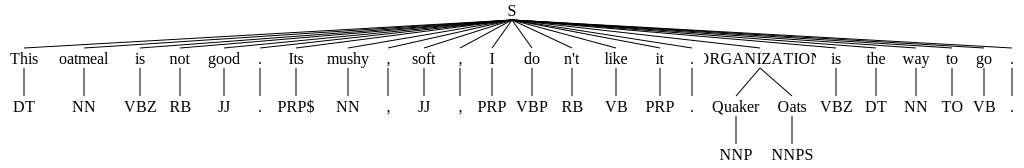

In [66]:
nltk.chunk.ne_chunk(tagged)

In [68]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## ROBERTa PRETRAINED MODEL

In [73]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [74]:
encoded_text = tokenizer(eg,return_tensors = 'pt')
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [75]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [76]:
output[0][0]

tensor([ 3.1436, -0.7107, -2.6559], grad_fn=<SelectBackward0>)

In [77]:
output[0][0].detach()

tensor([ 3.1436, -0.7107, -2.6559])

In [78]:
output[0][0].detach().numpy()

array([ 3.1436296, -0.7106689, -2.6558962], dtype=float32)

In [79]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.97635514, 0.02068746, 0.00295737], dtype=float32)

In [80]:
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
scores_dict

{'roberta_neg': np.float32(0.97635514),
 'roberta_neu': np.float32(0.020687465),
 'roberta_pos': np.float32(0.0029573706)}

In [83]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [84]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(eg)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

**See the results of Vader and Roberta models**

In [86]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example,return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg': float(scores[0]),
    'roberta_neu': float(scores[1]),
    'roberta_pos': float(scores[2])
  }
  return scores_dict

In [87]:
res = {}
for idx,row in tqdm(df.iterrows(),total = len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    roberta_res = polarity_scores_roberta(text)
    res[myid] = roberta_res
  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [91]:
res_df = pd.DataFrame(res).T
res_df

,roberta_neg,roberta_neu,roberta_pos
1,0.009624,0.049980,0.940395
2,0.508986,0.452414,0.038600
3,0.003229,0.098067,0.898704
4,0.002295,0.090219,0.907486
5,0.001635,0.010302,0.988063
...,...,...,...
496,0.001906,0.009862,0.988232
497,0.004415,0.034215,0.961369
498,0.006427,0.074537,0.919036
499,0.865614,0.119366,0.015020


In [92]:
res_df.reset_index()

,index,roberta_neg,roberta_neu,roberta_pos
0,1,0.009624,0.049980,0.940395
1,2,0.508986,0.452414,0.038600
2,3,0.003229,0.098067,0.898704
3,4,0.002295,0.090219,0.907486
4,5,0.001635,0.010302,0.988063
...,...,...,...,...
493,496,0.001906,0.009862,0.988232
494,497,0.004415,0.034215,0.961369
495,498,0.006427,0.074537,0.919036
496,499,0.865614,0.119366,0.015020


In [93]:
res_df = res_df.reset_index().rename(columns = {'index':'Id'})

In [94]:
res_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos
0,1,0.009624,0.049980,0.940395
1,2,0.508986,0.452414,0.038600
2,3,0.003229,0.098067,0.898704
3,4,0.002295,0.090219,0.907486
4,5,0.001635,0.010302,0.988063


In [95]:
res_df = res_df.merge(df,how='left')

In [96]:
res_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [97]:
res_df.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## REVIEW EXPLORARION

Positive but rating is 1

In [100]:
res_df.query('Score == 1').sort_values('roberta_pos',ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

Rating 5 but Negative

In [101]:
res_df.query('Score == 5').sort_values('roberta_neg',ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'